# Meta Methods

In [1]:
# Import libraries 
import pandas as pd   # Optional: good package for manipulating data 
import sklearn  # Package with learning algorithms implemented

dfTrain = pd.read_csv(r'..\Datasets\training-dataset-reduced.csv')
dfTest = pd.read_csv(r'..\Datasets\testing-dataset-reduced.csv')

#Remove id

dfTrain = dfTrain.iloc[: , 1:]
dfTest = dfTest.iloc[: , 1:]
X_train, y_train = dfTrain.drop('y', axis=1), dfTrain["y"]
X_test, y_test = dfTest.drop('y', axis=1), dfTest["y"]

display(dfTrain.head())
display(dfTest.head())

,age,campaign,cons.conf.idx,cons.price.idx,contact,day_of_week,default_unknown,default_yes,duration,education_basic.6y,...,marital_married,marital_single,marital_unknown,month,nr.employed,pdays,poutcome_nonexistent,poutcome_success,previous,y
0,0.419753,0.036364,0.602510,0.698753,1.0,0.75,0.0,0.0,0.707998,0.0,...,1.0,0.0,0.0,0.222222,0.859735,1.0,1.0,0.0,0.0,0.0
1,0.246914,0.127273,0.338912,0.669135,0.0,0.75,0.0,0.0,0.427908,0.0,...,1.0,0.0,0.0,0.444444,1.000000,1.0,1.0,0.0,0.0,0.0
2,0.185185,0.000000,0.602510,0.698753,1.0,0.25,1.0,0.0,0.667382,1.0,...,1.0,0.0,0.0,0.222222,0.859735,1.0,1.0,0.0,0.0,0.0
3,0.407407,0.000000,0.376569,0.882307,1.0,0.75,0.0,0.0,0.525348,0.0,...,1.0,0.0,0.0,0.333333,1.000000,1.0,1.0,0.0,0.0,0.0
4,0.370370,0.054545,0.418410,0.296960,0.0,0.00,0.0,0.0,0.646660,0.0,...,0.0,1.0,0.0,0.333333,0.425709,1.0,1.0,0.0,0.0,1.0


,age,campaign,cons.conf.idx,cons.price.idx,contact,day_of_week,default_unknown,default_yes,duration,education_basic.6y,...,marital_married,marital_single,marital_unknown,month,nr.employed,pdays,poutcome_nonexistent,poutcome_success,previous,y
0,0.098765,0.072727,0.154812,0.340608,0.0,0.0,0.0,0.0,0.638682,0.0,...,0.0,0.0,0.0,0.111111,0.512287,1.0,1.0,0.0,0.0,1.0
1,0.209877,0.000000,0.192469,0.269680,0.0,1.0,0.0,0.0,0.475605,0.0,...,0.0,1.0,0.0,0.222222,0.512287,1.0,1.0,0.0,0.0,0.0
2,0.518519,0.000000,0.602510,0.698753,1.0,0.0,1.0,0.0,0.378653,0.0,...,1.0,0.0,0.0,0.222222,0.859735,1.0,1.0,0.0,0.0,0.0
3,0.296296,0.018182,0.192469,0.269680,0.0,1.0,1.0,0.0,0.558171,0.0,...,1.0,0.0,0.0,0.222222,0.512287,1.0,1.0,0.0,0.0,0.0
4,0.395062,0.000000,0.602510,0.698753,1.0,1.0,0.0,0.0,0.579618,0.0,...,0.0,0.0,0.0,0.222222,0.859735,1.0,1.0,0.0,0.0,0.0


### cv value (number of partitions of k-fold cross validation): 

In [2]:
cv = 10

## Voting

#### Prepare and test the classifiers we will use with voting (naive bayes, knn and decision trees):

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as  plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf1 = GaussianNB()

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, y_train)
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    # scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
    clf.fit(X_train,y_train)#train by fit
    y_predicted = clf.predict(X_test)
    print("Accuracy: %0.3f [%s]" % (accuracy_score(y_test, y_predicted), label))

Best Params fo Knn= {'n_neighbors': 29, 'weights': 'distance'} Accuracy= 0.7393125509317413
Accuracy: 0.659 [Naive Bayes]
Accuracy: 0.802 [Knn (3)]
Accuracy: 0.857 [Dec. Tree]


#### Test the voting algorithm with different parameters: 

Hard voting (majority voting)

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
# scores = cross_val_score(eclf, X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
eclf.fit(X_train,y_train)#train by fit
y_predicted = eclf.predict(X_test)
print("Accuracy: %0.3f [%s]" % (accuracy_score(y_test, y_predicted) , "Majority Voting"))


Accuracy: 0.800 [Majority Voting]


Soft voting (Weighted voting)

In [14]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2,1,2])
# scores = cross_val_score(eclf, X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
eclf.fit(X_train,y_train)#train by fit
y_predicted = eclf.predict(X_test)
print("Accuracy: %0.3f [%s]" % (accuracy_score(y_test, y_predicted), "Weighted Voting -> Weights: nb=2, knn3=1, dt=2"))

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[1,2,2])
# scores = cross_val_score(eclf, X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
eclf.fit(X_train,y_train)#train by fit
y_predicted = eclf.predict(X_test)
print("Accuracy: %0.3f [%s]" % (accuracy_score(y_test, y_predicted), "Weighted Voting -> Weights: nb=1, knn3=2, dt=2"))

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[1,2,3])
# scores = cross_val_score(eclf, X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
eclf.fit(X_train,y_train)#train by fit
y_predicted = eclf.predict(X_test)
print("Accuracy: %0.3f [%s]" % (accuracy_score(y_test, y_predicted), "Weighted Voting -> Weights: nb=1, knn3=2, dt=3"))

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2,1,3])
# scores = cross_val_score(eclf, X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
eclf.fit(X_train,y_train)#train by fit
y_predicted = eclf.predict(X_test)
print("Accuracy: %0.3f [%s]" % (accuracy_score(y_test, y_predicted), "Weighted Voting -> Weights: nb=2, knn3=1, dt=3"))

Accuracy: 0.812 [Weighted Voting -> Weights: nb=2, knn3=1, dt=2]
Accuracy: 0.854 [Weighted Voting -> Weights: nb=1, knn3=2, dt=2]
Accuracy: 0.857 [Weighted Voting -> Weights: nb=1, knn3=2, dt=3]
Accuracy: 0.861 [Weighted Voting -> Weights: nb=2, knn3=1, dt=3]


#### Print extra information for the best execution of the above ones (confusion matrix, classification report): 

Best execution: Soft voting, Weights: nb=1, knn3=2, dt=3"

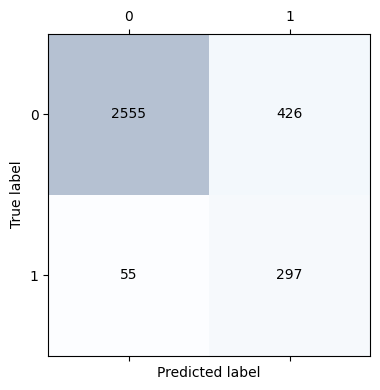

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.91      2981
         1.0       0.41      0.84      0.55       352

    accuracy                           0.86      3333
   macro avg       0.69      0.85      0.73      3333
weighted avg       0.92      0.86      0.88      3333



In [15]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[1,2,3])
# predicted = cross_val_predict(eclf, X=X_train, y=y_train,  cv=cv) #to get the perfomance of the predictions depending on the value of the predicted variable
eclf.fit(X_train,y_train)#train by fit
y_predicted = eclf.predict(X_test)

#print the confusion matrix
confmat = confusion_matrix(y_test, y_predicted)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

#print the classification report
print(classification_report(y_test, y_predicted))


## Bagging

We are gonna use bagging with decision trees as it is one of the algorothms that performs best.

#### Test the bagging algorithm with different parameters: varying the number of estimators and the maxinmum number of features

In [16]:
from sklearn.ensemble import BaggingClassifier


print("With default max_features=1.0, and varying the number of estimators: ")
for nest in [1,2,5,10,20,50,100,200, 250]:
    eclf = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest)
    # scores = cross_val_score(eclf, X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
    eclf.fit(X_train,y_train)#train by fit
    y_predicted = eclf.predict(X_test)
    print("\tAccuracy: %0.3f [%s]" % (accuracy_score(y_test, y_predicted), nest))


print("\nWith max_features=0.75, and varying the number of estimators: ")
for nest in [1,2,5,10,20,50,100,200, 250]:
    eclf = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.75)
    # scores = cross_val_score(eclf, X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
    eclf.fit(X_train,y_train)#train by fit
    y_predicted = eclf.predict(X_test)
    print("\tAccuracy: %0.3f [%s]" % (accuracy_score(y_test, y_predicted), nest))


print("\nWith max_features=0.5, and varying the number of estimators: ")
for nest in [1,2,5,10,20,50,100,200, 250]:
    eclf = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.5)
    # scores = cross_val_score(eclf, X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
    eclf.fit(X_train,y_train)#train by fit
    y_predicted = eclf.predict(X_test)
    print("\tAccuracy: %0.3f [%s]" % (accuracy_score(y_test, y_predicted), nest))


print("\nWith max_features=0.35, and varying the number of estimators: ")
for nest in [1,2,5,10,20,50,100,200, 250]:
    eclf = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.35)
    # scores = cross_val_score(eclf, X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
    eclf.fit(X_train,y_train)#train by fit
    y_predicted = eclf.predict(X_test)
    print("\tAccuracy: %0.3f [%s]" % (accuracy_score(y_test, y_predicted), nest))


print("\nWith max_features=0.25, and varying the number of estimators: ")
for nest in [1,2,5,10,20,50,100,200, 250]:
    eclf = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=nest,max_features=0.25)
    # scores = cross_val_score(eclf, X_train, y_train, cv=cv, scoring='accuracy') #to get the mean of the perfomance of the predtictions of all the splits
    eclf.fit(X_train,y_train)#train by fit
    y_predicted = eclf.predict(X_test)
    print("\tAccuracy: %0.3f [%s]" % (accuracy_score(y_test, y_predicted), nest))

With default max_features=1.0, and varying the number of estimators: 
	Accuracy: 0.852 [1]
	Accuracy: 0.886 [2]
	Accuracy: 0.864 [5]
	Accuracy: 0.863 [10]
	Accuracy: 0.869 [20]
	Accuracy: 0.867 [50]
	Accuracy: 0.864 [100]
	Accuracy: 0.865 [200]
	Accuracy: 0.863 [250]

With max_features=0.75, and varying the number of estimators: 
	Accuracy: 0.842 [1]
	Accuracy: 0.883 [2]
	Accuracy: 0.856 [5]
	Accuracy: 0.875 [10]
	Accuracy: 0.871 [20]
	Accuracy: 0.869 [50]
	Accuracy: 0.868 [100]
	Accuracy: 0.866 [200]
	Accuracy: 0.866 [250]

With max_features=0.5, and varying the number of estimators: 
	Accuracy: 0.662 [1]
	Accuracy: 0.893 [2]
	Accuracy: 0.764 [5]
	Accuracy: 0.846 [10]
	Accuracy: 0.867 [20]
	Accuracy: 0.869 [50]
	Accuracy: 0.872 [100]
	Accuracy: 0.872 [200]
	Accuracy: 0.869 [250]

With max_features=0.35, and varying the number of estimators: 
	Accuracy: 0.746 [1]
	Accuracy: 0.790 [2]
	Accuracy: 0.810 [5]
	Accuracy: 0.859 [10]
	Accuracy: 0.860 [20]
	Accuracy: 0.866 [50]
	Accuracy: 0.874

#### Print extra information for the best execution of the above ones (confusion matrix, classification report): 

Best execution: max_features: 0.35, number of estimators: 100

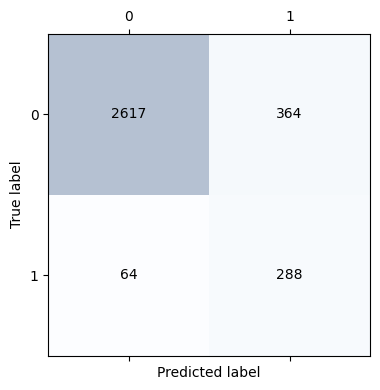

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.92      2981
         1.0       0.44      0.82      0.57       352

    accuracy                           0.87      3333
   macro avg       0.71      0.85      0.75      3333
weighted avg       0.92      0.87      0.89      3333



In [17]:
eclf = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100, max_features=0.35)
# predicted = cross_val_predict(eclf, X_train, y_train, cv=cv) #to get the perfomance of the predictions depending on the value of the predicted variable
eclf.fit(X_train,y_train)#train by fit
y_predicted = eclf.predict(X_test)

#print the confusion matrix
confmat = confusion_matrix(y_test, y_predicted)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

#print the classification report
print(classification_report(y_test, y_predicted))


## Random Forest

Now we are going to execute the random forest algorithm and see the accuracy and f-measure.

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators=200)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))

0.8667866786678667
[[2564  417]
 [  27  325]]

Accuracy: 0.8667866786678667

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      2981
         1.0       0.44      0.92      0.59       352

    accuracy                           0.87      3333
   macro avg       0.71      0.89      0.76      3333
weighted avg       0.93      0.87      0.89      3333



Now we are going to try with ExtraTreesClassifier in order to introduce more randomness in the random trees.

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))

0.8583858385838584
[[2558  423]
 [  49  303]]

Accuracy: 0.8583858385838584

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      2981
         1.0       0.42      0.86      0.56       352

    accuracy                           0.86      3333
   macro avg       0.70      0.86      0.74      3333
weighted avg       0.92      0.86      0.88      3333



## Boosting

In [48]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=200)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))

0.8751875187518752
[[2615  366]
 [  50  302]]

Accuracy: 0.8751875187518752

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      2981
         1.0       0.45      0.86      0.59       352

    accuracy                           0.88      3333
   macro avg       0.72      0.87      0.76      3333
weighted avg       0.93      0.88      0.89      3333



Now we are going to try boosting with decision tree classifiers with depth = 5

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()
print(sklearn.metrics.classification_report(y_test, pred))

0.8586858685868587
[[2550  431]
 [  40  312]]

Accuracy: 0.8586858685868587

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      2981
         1.0       0.42      0.89      0.57       352

    accuracy                           0.86      3333
   macro avg       0.70      0.87      0.74      3333
weighted avg       0.92      0.86      0.88      3333

